In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv(r"C:\Users\Komal\Downloads\placement.csv")

In [37]:
df.shape

(1000, 3)

In [38]:
df.sample(5)

,cgpa,placement_exam_marks,placed
942,7.03,6.0,0
631,7.26,16.0,0
450,6.44,31.0,1
806,6.39,15.0,0
971,6.69,18.0,1


<Figure size 1000x300 with 0 Axes>

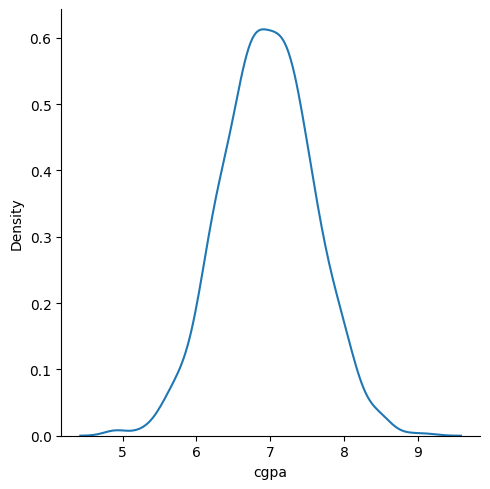

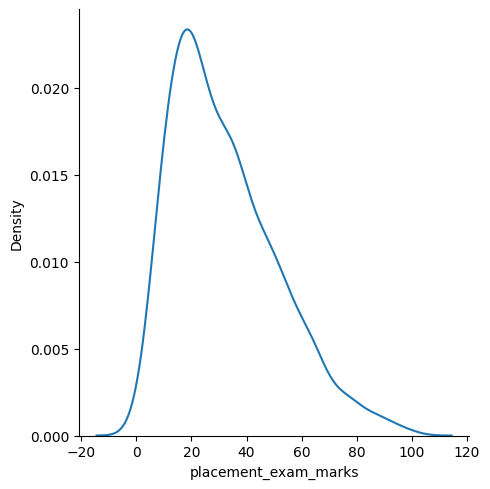

In [39]:
plt.figure(figsize=(10,3))
# plt.subplot(1,2,1)
sns.displot(df['cgpa'],kind = 'kde')

# plt.subplot(1,2,2)
sns.displot(df['placement_exam_marks'],kind = 'kde')

plt.show()

<Axes: ylabel='cgpa'>

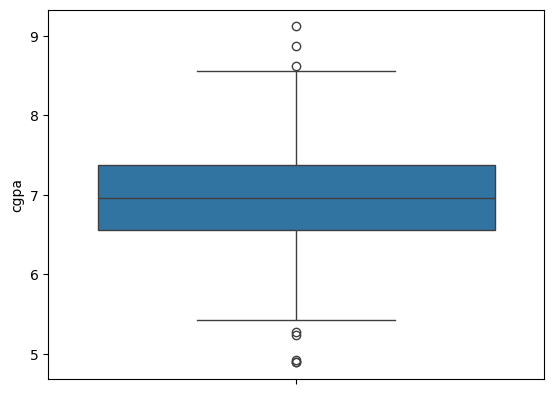

In [40]:
sns.boxplot(df['cgpa'])

In [41]:
# -0.5 to 0.5
df['placement_exam_marks'].skew()

0.8356419499466834

In [42]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [43]:
df['cgpa'].mean() - 3*df['cgpa'].std()

5.113546374602832

In [44]:
# Finding the boundary values

print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [45]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [46]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [47]:
Z=  X - 𝜇
   ------
      𝜎
 
Where:

Z
Z = Z-score

𝑋
X = data point

𝜇
μ = mean

𝜎
σ = standard deviation

Z = 0 → value is exactly at the mean

Z > 0 → value is above the mean

Z < 0 → value is below the mean

IndentationError: unexpected indent (2265850821.py, line 2)

In [48]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [49]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [50]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [51]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [52]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [53]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [54]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [55]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [56]:
df['cgpa_cap'] = np.where(df['cgpa'] < lower_limit ,
                          lower_limit,
                          np.where(df['cgpa'] > upper_limit , 
                                   upper_limit,df['cgpa']))

In [57]:
dff = df.drop(columns = ['cgpa'])

In [58]:
df

,cgpa,placement_exam_marks,placed,cgpa_zscore,cgpa_cap
0,7.19,26.0,1,0.371425,7.190000
1,7.46,38.0,1,0.809810,7.460000
2,7.54,40.0,1,0.939701,7.540000
3,6.42,8.0,1,-0.878782,6.420000
4,7.23,17.0,0,0.436371,7.230000
...,...,...,...,...,...
995,8.87,44.0,1,3.099150,8.808934
996,9.12,65.0,1,3.505062,8.808934
997,4.89,34.0,0,-3.362960,5.113546
998,8.62,46.0,1,2.693239,8.620000


In [59]:
lower_limit

5.113546374602832

In [60]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [61]:
df.shape

(1000, 5)

In [62]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

Original Skew: 2.2360670668221023
Transformed Skew: 2.2227206162293554


<Axes: ylabel='Income'>

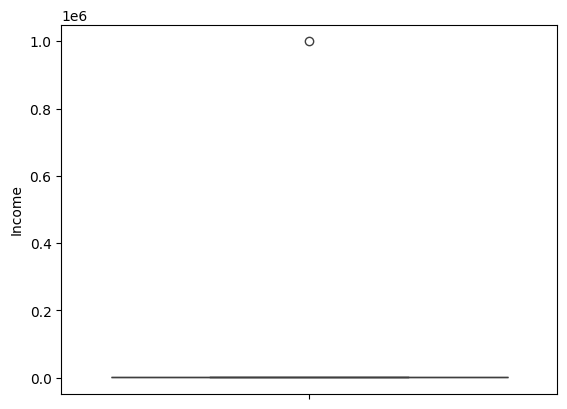

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.DataFrame({'Income': [1000, 1200, 1300, 1500, 1000000]})  # Outlier

print("Original Skew:", df['Income'].skew())

# Log transformation
df['Income_log'] = np.log1p(df['Income'])

print("Transformed Skew:", df['Income_log'].skew())

# Visualize
sns.boxplot(df['Income'])
